<a href="https://colab.research.google.com/github/HarikrishnaYashoda/Driver-Life-time-value/blob/main/Driver_life_time_value.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Read and Explore all Datasets**

In [1]:
# Import the required libraries
import pandas as pd # for data manipulation and analysis
import numpy as np # for numerical operations
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for advanced data visualization

In [2]:
# Read all datasets
# Read the driver_ids.csv file and store the data in a pandas DataFrame called driver_ids.
driver_ids = pd.read_csv('driver_ids.csv')

# Read the ride_timestamps.csv file and store the data in a pandas DataFrame called ride_timestamps.
ride_timestamps = pd.read_csv('ride_timestamps.csv')

# Read the ride_ids.csv file and store the data in a pandas DataFrame called ride_ids.
ride_ids = pd.read_csv('ride_ids.csv')

In [3]:
# print sample of driver_ids data
driver_ids.sample(2)

,driver_id,driver_onboard_date
852,e58dab18de6e4134d8b232e57ce1d86e,2016-05-10 00:00:00
14,039da9c077e17af98ca8530e4d7975f1,2016-05-04 00:00:00


In [4]:
# Some info about driver_ids data

# Print shape (num. of rows, num. of columns)
print('Shape of data: ', driver_ids.shape)
# Print unique of driver id
print('unique of driver id: ', len(driver_ids['driver_id'].unique()) )
# Print Minimum and Maximum value of driver onboard date
print('Minimum date: ',driver_ids['driver_onboard_date'].min())
print('Maximum date: ',driver_ids['driver_onboard_date'].max())

Shape of data:  (937, 2)
unique of driver id:  937
Minimum date:  2016-03-28 00:00:00
Maximum date:  2016-05-15 00:00:00


In [5]:
# print sample of ride_timestamps data
ride_timestamps.sample(2)

,ride_id,event,timestamp
943798,f8ec639b841f963c23adf201b296e892,picked_up_at,2016-05-22 03:28:21
321049,54958a4b10aba355e9bc73de54da2e9c,dropped_off_at,2016-05-29 00:22:22


In [6]:
# Some info about ride_timestamps data

# Print shape (num. of rows, num. of columns)
print('Shape of data: ', ride_timestamps.shape)
# Print unique count of ride id
print('unique of ride id: ', len(ride_timestamps['ride_id'].unique()))
# Print count of every value in column Event
ride_timestamps['event'].value_counts()

Shape of data:  (970405, 3)
unique of ride id:  194081


,count
event,
requested_at,194081
accepted_at,194081
arrived_at,194081
picked_up_at,194081
dropped_off_at,194081


In [7]:
# print sample of ride_ids data
ride_ids.sample(2)

,driver_id,ride_id,ride_distance,ride_duration,ride_prime_time
17758,1989ad384dd8ab8f43fd19822c36aeac,9261a645d28a7423bee95f6de7e02eca,3261,451,0
139869,af74473d8f38c0c3e8cba5b72f747281,d6ded8ff6a38985c7bef3f191b771ec1,1280,169,25


In [8]:
# Some info about ride_ids data

# Print shape (num. of rows, num. of columns)
print('Shape of data: ', ride_ids.shape)
# Print count unique values of driver id
print('unique of driver id: ', len(ride_ids['driver_id'].unique()))
# Print count unique values of ride id
print('unique of ride id: ', len(ride_ids['ride_id'].unique()))
# Description of numeric columns (ride_distance, ride_duration, ride_prime_time)
ride_ids.describe()

Shape of data:  (193502, 5)
unique of driver id:  937
unique of ride id:  193502


,ride_distance,ride_duration,ride_prime_time
count,193502.000000,193502.000000,193502.000000
mean,6955.218266,858.966099,17.305893
std,8929.444606,571.375818,30.825800
min,-2.000000,2.000000,0.000000
25%,2459.000000,491.000000,0.000000
50%,4015.000000,727.000000,0.000000
75%,7193.000000,1069.000000,25.000000
max,724679.000000,28204.000000,500.000000


**Data Engineering**

**Calculate the Total Cost of Ride**

We calculate the cost per ride using the assumptions from the Lyft rate card given:

Base Fare $2.00

Cost per Mile $1.15

Cost per Minute $0.22

Service Fee $1.75

Minimum Fare $5.00

Maximum Fare $400.00

We also apply assumptions regarding applying the Prime Time rate and the Service Fee in line with the actual pricing model of Lyft as described in many articles such as this one

So we calculate it by using this formula:

(
base fare
+
cost per mile
×
ride_distance
+
cost per minute
×
ride_duration
)
×
(
1
+
ride_prime_time
100
)
+
service fee


After that, we check if there are any costs less than Minimum Fare, or more than Maximum Fare are change them appropriately, to either Minimum or Maximum Fare respectively.

In [9]:
# constant variables used  to calc. total cost of ride (driver's lifetime value)
BASEFARE = 2.00
COSTPERMILE = 1.15
COSTPERMIN = 0.22
SERVICEFEE = 1.75
MINFARE = 5.00
MAXFARE = 400.00
# calc. total life time of ride (convert ride_distance from meters to miles, convert ride_duration from seconds to minutes)
ride_ids['ride_total_cost'] = ( (BASEFARE + (COSTPERMIN*(ride_ids['ride_duration']/60)) + (COSTPERMILE*(ride_ids['ride_distance']*0.000621))) * (1 + ride_ids['ride_prime_time']/100) ) + SERVICEFEE

# Apply lower and upper bound to ride cost (Minimum Fare, Maximum Fare )
ride_ids['ride_total_cost'] = np.where(ride_ids['ride_total_cost'] < MINFARE, MINFARE, ride_ids['ride_total_cost'])
ride_ids['ride_total_cost'] = np.where(ride_ids['ride_total_cost'] > MAXFARE, MAXFARE, ride_ids['ride_total_cost'])
# print first 3 rows in dataframe
ride_ids.head(3)

,driver_id,ride_id,ride_distance,ride_duration,ride_prime_time,ride_total_cost
0,002be0ffdc997bd5c50703158b7c2491,006d61cf7446e682f7bc50b0f8a5bea5,1811,327,50,8.488488
1,002be0ffdc997bd5c50703158b7c2491,01b522c5c3a756fbdb12e95e87507eda,3362,809,0,9.117306
2,002be0ffdc997bd5c50703158b7c2491,029227c4c2971ce69ff2274dc798ef43,3282,572,0,8.191174


***Create Features of the Rides***

In [10]:
# Pivot the ride events
ride_events = ride_timestamps.pivot(index = 'ride_id', columns = 'event', values = 'timestamp')
ride_events.head(3)

event,accepted_at,arrived_at,dropped_off_at,picked_up_at,requested_at
ride_id,,,,,
00003037a262d9ee40e61b5c0718f7f0,2016-06-13 09:39:51,2016-06-13 09:44:31,2016-06-13 10:03:05,2016-06-13 09:44:33,2016-06-13 09:39:19
00005eae40882760d675da5effb89ae3,2016-05-14 05:23:25,2016-05-14 05:26:17,2016-05-14 05:34:17,2016-05-14 05:26:18,2016-05-14 05:23:21
000061d42cf29f73b591041d9a1b2973,2016-05-16 15:43:14,2016-05-16 15:47:29,2016-05-16 15:54:18,2016-05-16 15:47:32,2016-05-16 15:43:09


In [11]:
# Merge ride_ids data with ride events on ride_id
ride_data = pd.merge(ride_ids, ride_events, on='ride_id')
print('Shape of Ride data :', ride_data.shape)
ride_data.head(3)

Shape of Ride data : (184819, 11)


,driver_id,ride_id,ride_distance,ride_duration,ride_prime_time,ride_total_cost,accepted_at,arrived_at,dropped_off_at,picked_up_at,requested_at
0,002be0ffdc997bd5c50703158b7c2491,006d61cf7446e682f7bc50b0f8a5bea5,1811,327,50,8.488488,2016-04-23 02:14:15,2016-04-23 02:16:36,2016-04-23 02:22:07,2016-04-23 02:16:40,2016-04-23 02:13:50
1,002be0ffdc997bd5c50703158b7c2491,01b522c5c3a756fbdb12e95e87507eda,3362,809,0,9.117306,2016-03-29 19:00:52,2016-03-29 19:03:57,2016-03-29 19:17:30,2016-03-29 19:04:01,2016-03-29 19:00:49
2,002be0ffdc997bd5c50703158b7c2491,029227c4c2971ce69ff2274dc798ef43,3282,572,0,8.191174,2016-06-21 11:56:39,2016-06-21 12:01:32,2016-06-21 12:11:07,2016-06-21 12:01:35,2016-06-21 11:56:31


In [12]:
# Info about ride_data
ride_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184819 entries, 0 to 184818
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   driver_id        184819 non-null  object 
 1   ride_id          184819 non-null  object 
 2   ride_distance    184819 non-null  int64  
 3   ride_duration    184819 non-null  int64  
 4   ride_prime_time  184819 non-null  int64  
 5   ride_total_cost  184819 non-null  float64
 6   accepted_at      184819 non-null  object 
 7   arrived_at       184818 non-null  object 
 8   dropped_off_at   184819 non-null  object 
 9   picked_up_at     184819 non-null  object 
 10  requested_at     184819 non-null  object 
dtypes: float64(1), int64(3), object(7)
memory usage: 15.5+ MB


In [13]:
# Create some Features
# It is the time a driver takes to accept a ride once it is requested in minutes.
ride_data['ride_accept_response_time'] = (pd.to_datetime(ride_data['accepted_at']) - pd.to_datetime(ride_data['requested_at'])).astype('timedelta64[s]')/60
# It is the time a driver takes to reach the pickup location once a ride is accepted in minutes.
ride_data['ride_arrival_time'] = (pd.to_datetime(ride_data['arrived_at']) - pd.to_datetime(ride_data['accepted_at'])).astype('timedelta64[s]')/60
# It is the time a driver waits for the rider once the driver reaches the pickup location in minutes.
ride_data['ride_wait_time'] = (pd.to_datetime(ride_data['picked_up_at']) - pd.to_datetime(ride_data['arrived_at'])).astype('timedelta64[s]')/60
# divide ride distance to 3 categories (Short ride, medium ride, long ride) dependant on ride_distance column (KM)
ride_data["ride_length"] = np.where(ride_data["ride_distance"] > ride_data['ride_distance'].quantile(0.33), (np.where(ride_data["ride_distance"] < ride_data['ride_distance'].quantile(0.66), "med_ride", "long_ride")), "short_ride")
# divide ride time to 3 categories (Morning ride, evening ride, night ride) dependant on accepted_at column (time)
ride_data["ride_time"] = np.where(pd.to_datetime(ride_data['accepted_at']).dt.hour > 6, (np.where(pd.to_datetime(ride_data['accepted_at']).dt.hour <= 15, "morning_ride", (np.where(pd.to_datetime(ride_data['accepted_at']).dt.hour <= 21, "evening_ride", "night_ride")))), "night_ride")
# Convert accepted_at column to date
ride_data['ride_date'] = pd.to_datetime(ride_data['accepted_at']).dt.date
# Print first 3 rows in ride data
ride_data.head(3)

,driver_id,ride_id,ride_distance,ride_duration,ride_prime_time,ride_total_cost,accepted_at,arrived_at,dropped_off_at,picked_up_at,requested_at,ride_accept_response_time,ride_arrival_time,ride_wait_time,ride_length,ride_time,ride_date
0,002be0ffdc997bd5c50703158b7c2491,006d61cf7446e682f7bc50b0f8a5bea5,1811,327,50,8.488488,2016-04-23 02:14:15,2016-04-23 02:16:36,2016-04-23 02:22:07,2016-04-23 02:16:40,2016-04-23 02:13:50,0 days,0 days 00:00:02,0 days,short_ride,night_ride,2016-04-23
1,002be0ffdc997bd5c50703158b7c2491,01b522c5c3a756fbdb12e95e87507eda,3362,809,0,9.117306,2016-03-29 19:00:52,2016-03-29 19:03:57,2016-03-29 19:17:30,2016-03-29 19:04:01,2016-03-29 19:00:49,0 days,0 days 00:00:03,0 days,med_ride,evening_ride,2016-03-29
2,002be0ffdc997bd5c50703158b7c2491,029227c4c2971ce69ff2274dc798ef43,3282,572,0,8.191174,2016-06-21 11:56:39,2016-06-21 12:01:32,2016-06-21 12:11:07,2016-06-21 12:01:35,2016-06-21 11:56:31,0 days,0 days 00:00:04,0 days,med_ride,morning_ride,2016-06-21


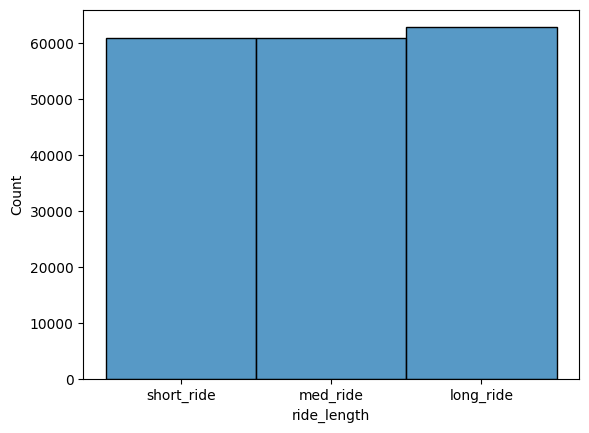

In [14]:
# histogram of ride length categories
sns.histplot(ride_data["ride_length"])
plt.show()

**Create Features of the Drivers**

In [15]:
# calculate driver_perday_ridecount
driver_perday_ridecount = ride_data.pivot_table(index = 'driver_id', columns = 'ride_date', aggfunc='size').fillna(0)
driver_perday_ridecount.head(3)

ride_date,2016-03-28,2016-03-29,2016-03-30,2016-03-31,2016-04-01,2016-04-02,2016-04-03,2016-04-04,2016-04-05,2016-04-06,...,2016-06-17,2016-06-18,2016-06-19,2016-06-20,2016-06-21,2016-06-22,2016-06-23,2016-06-24,2016-06-25,2016-06-26
driver_id,,,,,,,,,,,,,,,,,,,,,
002be0ffdc997bd5c50703158b7c2491,0.0,6.0,0.0,8.0,7.0,5.0,0.0,0.0,7.0,0.0,...,1.0,3.0,0.0,2.0,9.0,3.0,5.0,0.0,0.0,0.0
007f0389f9c7b03ef97098422f902e62,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0
011e5c5dfc5c2c92501b8b24d47509bc,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
driver_info = pd.DataFrame()
# Calc. driver total ride count
driver_info['total_ride_count'] = ride_data.pivot_table(index=['driver_id'], aggfunc='size')
# Calc. driver total ride distance
driver_info['total_distance']  = ride_ids.groupby('driver_id')['ride_distance'].sum()
# Calc. driver total ride duration
driver_info['total_duration']  = ride_ids.groupby('driver_id')['ride_duration'].sum()
# Calc. driver lifetime value (total revenue)
driver_info['lifetime_value'] = ride_ids.groupby('driver_id')['ride_total_cost'].sum()
# Calc. mean driver count ride per day
driver_info['perday_ridecount_mean'] = driver_perday_ridecount.mean(axis=1)
# Calc. mean of ride accept responce time for every driver
driver_info['accept_response_time_mean'] = (ride_data.groupby(ride_data['driver_id']).aggregate({'ride_accept_response_time': 'mean'})).iloc[:,0]
# Calc. mean of ride arrival time for every driver
driver_info['arrival_time_mean'] = (ride_data.groupby(ride_data['driver_id']).aggregate({'ride_arrival_time': 'mean'})).iloc[:,0]
# Calc. mean of ride wait time for every driver
driver_info['wait_time_mean'] = (ride_data.groupby(ride_data['driver_id']).aggregate({'ride_wait_time': 'mean'})).iloc[:,0]
# count total no. of short/medium/long evening rides
driver_info = pd.merge(driver_info, ride_data.pivot_table(index = 'driver_id', columns = 'ride_length', aggfunc='size') ,on='driver_id')
# count total no. of day/night/night evening rides
driver_info = pd.merge(driver_info, ride_data.pivot_table(index = 'driver_id', columns = 'ride_time', aggfunc='size') ,on='driver_id')

# fill nan value with 0
driver_info = driver_info.fillna(0).reset_index()
driver_info.head(5)

,driver_id,total_ride_count,total_distance,total_duration,lifetime_value,perday_ridecount_mean,accept_response_time_mean,arrival_time_mean,wait_time_mean,long_ride,med_ride,short_ride,evening_ride,morning_ride,night_ride
0,002be0ffdc997bd5c50703158b7c2491,277,1740287,221238,3560.056648,3.043956,0 days,0 days 00:00:02,0 days,79,103,95,103.0,85.0,89.0
1,007f0389f9c7b03ef97098422f902e62,31,117531,20497,321.434698,0.340659,0 days,0 days 00:00:02,0 days,5,15,11,24.0,6.0,1.0
2,011e5c5dfc5c2c92501b8b24d47509bc,34,269653,29205,482.299206,0.373626,0 days,0 days 00:00:03,0 days,11,11,12,24.0,8.0,2.0
3,0152a2f305e71d26cc964f8d4411add9,191,1471239,174521,2610.189071,2.098901,0 days,0 days 00:00:03,0 days,99,51,41,17.0,67.0,107.0
4,01674381af7edd264113d4e6ed55ecda,375,3123644,357443,5379.644866,4.120879,0 days,0 days 00:00:03,0 days,157,111,107,0.0,350.0,25.0


In [18]:
# Calc how long do the driver typically continue driving with Lyft
onboard_data = pd.merge(ride_data.groupby('driver_id').agg({'accepted_at': max}), driver_ids , on='driver_id')
# Calc. driver_duration the long of how driver continue driving with lyft par days
# Calculate the difference in days by accessing the .dt.days attribute
onboard_data['driver_duration'] = (pd.to_datetime(onboard_data['accepted_at']) - pd.to_datetime(onboard_data['driver_onboard_date'])).dt.days
onboard_data = onboard_data[['driver_id', 'driver_duration']]
onboard_data

<ipython-input-18-070afccbeade>:2: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  onboard_data = pd.merge(ride_data.groupby('driver_id').agg({'accepted_at': max}), driver_ids , on='driver_id')


,driver_id,driver_duration
0,002be0ffdc997bd5c50703158b7c2491,86
1,007f0389f9c7b03ef97098422f902e62,85
2,011e5c5dfc5c2c92501b8b24d47509bc,68
3,0152a2f305e71d26cc964f8d4411add9,64
4,01674381af7edd264113d4e6ed55ecda,56
...,...,...
832,ff419a3476e21e269e340b5f1f05414e,61
833,ff714a67ba8c6a108261cd81e3b77f3a,81
834,fff482c704d36a1afe8b8978d5486283,34
835,fffecccc49436c5389075b13209f0dfa,51


In [19]:
driver_info = pd.merge(driver_info, onboard_data, on= 'driver_id' , how='inner')
driver_info

,driver_id,total_ride_count,total_distance,total_duration,lifetime_value,perday_ridecount_mean,accept_response_time_mean,arrival_time_mean,wait_time_mean,long_ride,med_ride,short_ride,evening_ride,morning_ride,night_ride,driver_duration
0,002be0ffdc997bd5c50703158b7c2491,277,1740287,221238,3560.056648,3.043956,0 days,0 days 00:00:02,0 days,79,103,95,103.0,85.0,89.0,86
1,007f0389f9c7b03ef97098422f902e62,31,117531,20497,321.434698,0.340659,0 days,0 days 00:00:02,0 days,5,15,11,24.0,6.0,1.0,85
2,011e5c5dfc5c2c92501b8b24d47509bc,34,269653,29205,482.299206,0.373626,0 days,0 days 00:00:03,0 days,11,11,12,24.0,8.0,2.0,68
3,0152a2f305e71d26cc964f8d4411add9,191,1471239,174521,2610.189071,2.098901,0 days,0 days 00:00:03,0 days,99,51,41,17.0,67.0,107.0,64
4,01674381af7edd264113d4e6ed55ecda,375,3123644,357443,5379.644866,4.120879,0 days,0 days 00:00:03,0 days,157,111,107,0.0,350.0,25.0,56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
832,ff419a3476e21e269e340b5f1f05414e,242,2002400,246308,3537.441127,2.659341,0 days,0 days 00:00:04,0 days,98,56,88,56.0,161.0,25.0,61
833,ff714a67ba8c6a108261cd81e3b77f3a,485,2834765,442492,6285.948397,5.329670,0 days,0 days 00:00:02,0 days,161,155,169,164.0,308.0,13.0,81
834,fff482c704d36a1afe8b8978d5486283,35,174394,27693,380.579655,0.384615,0 days,0 days 00:00:03,0 days,11,7,17,1.0,34.0,0.0,34
835,fffecccc49436c5389075b13209f0dfa,406,2924913,353974,6050.600054,4.461538,0 days,0 days 00:00:03,0 days,137,141,128,135.0,153.0,118.0,51


**Exploratory Data Analysis**

In [20]:
# Get description of data
driver_info.describe()

,total_ride_count,total_distance,total_duration,lifetime_value,perday_ridecount_mean,accept_response_time_mean,arrival_time_mean,wait_time_mean,long_ride,med_ride,short_ride,evening_ride,morning_ride,night_ride,driver_duration
count,837.000000,8.370000e+02,837.000000,837.000000,837.000000,837,837,837,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000
mean,220.082437,1.528516e+06,189242.789725,2979.103812,2.418488,0 days 00:00:00,0 days 00:00:03,0 days 00:00:00,74.874552,72.569892,72.637993,84.874552,85.178017,50.029869,55.075269
std,178.180347,1.259931e+06,154009.144305,2416.298144,1.958026,0 days 00:00:00,0 days 00:00:01,0 days 00:00:00,60.894880,60.813653,62.422290,81.688592,92.089711,64.935745,21.721934
min,3.000000,9.895000e+03,1712.000000,25.687087,0.032967,0 days 00:00:00,0 days 00:00:01,-1 days +23:59:59,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,44.000000,3.390140e+05,38363.000000,618.060833,0.483516,0 days 00:00:00,0 days 00:00:02,0 days 00:00:00,18.000000,14.000000,14.000000,17.000000,15.000000,5.000000,42.000000
50%,224.000000,1.451389e+06,189906.000000,2958.450547,2.461538,0 days 00:00:00,0 days 00:00:03,0 days 00:00:00,71.000000,72.000000,72.000000,60.000000,44.000000,22.000000,57.000000
75%,330.000000,2.311846e+06,288097.000000,4475.228280,3.626374,0 days 00:00:00,0 days 00:00:04,0 days 00:00:00,114.000000,111.000000,112.000000,140.000000,139.000000,74.000000,73.000000
max,919.000000,6.628201e+06,779797.000000,12347.102999,10.098901,0 days 00:00:00,0 days 00:00:11,0 days 00:00:00,335.000000,294.000000,313.000000,404.000000,515.000000,470.000000,90.000000


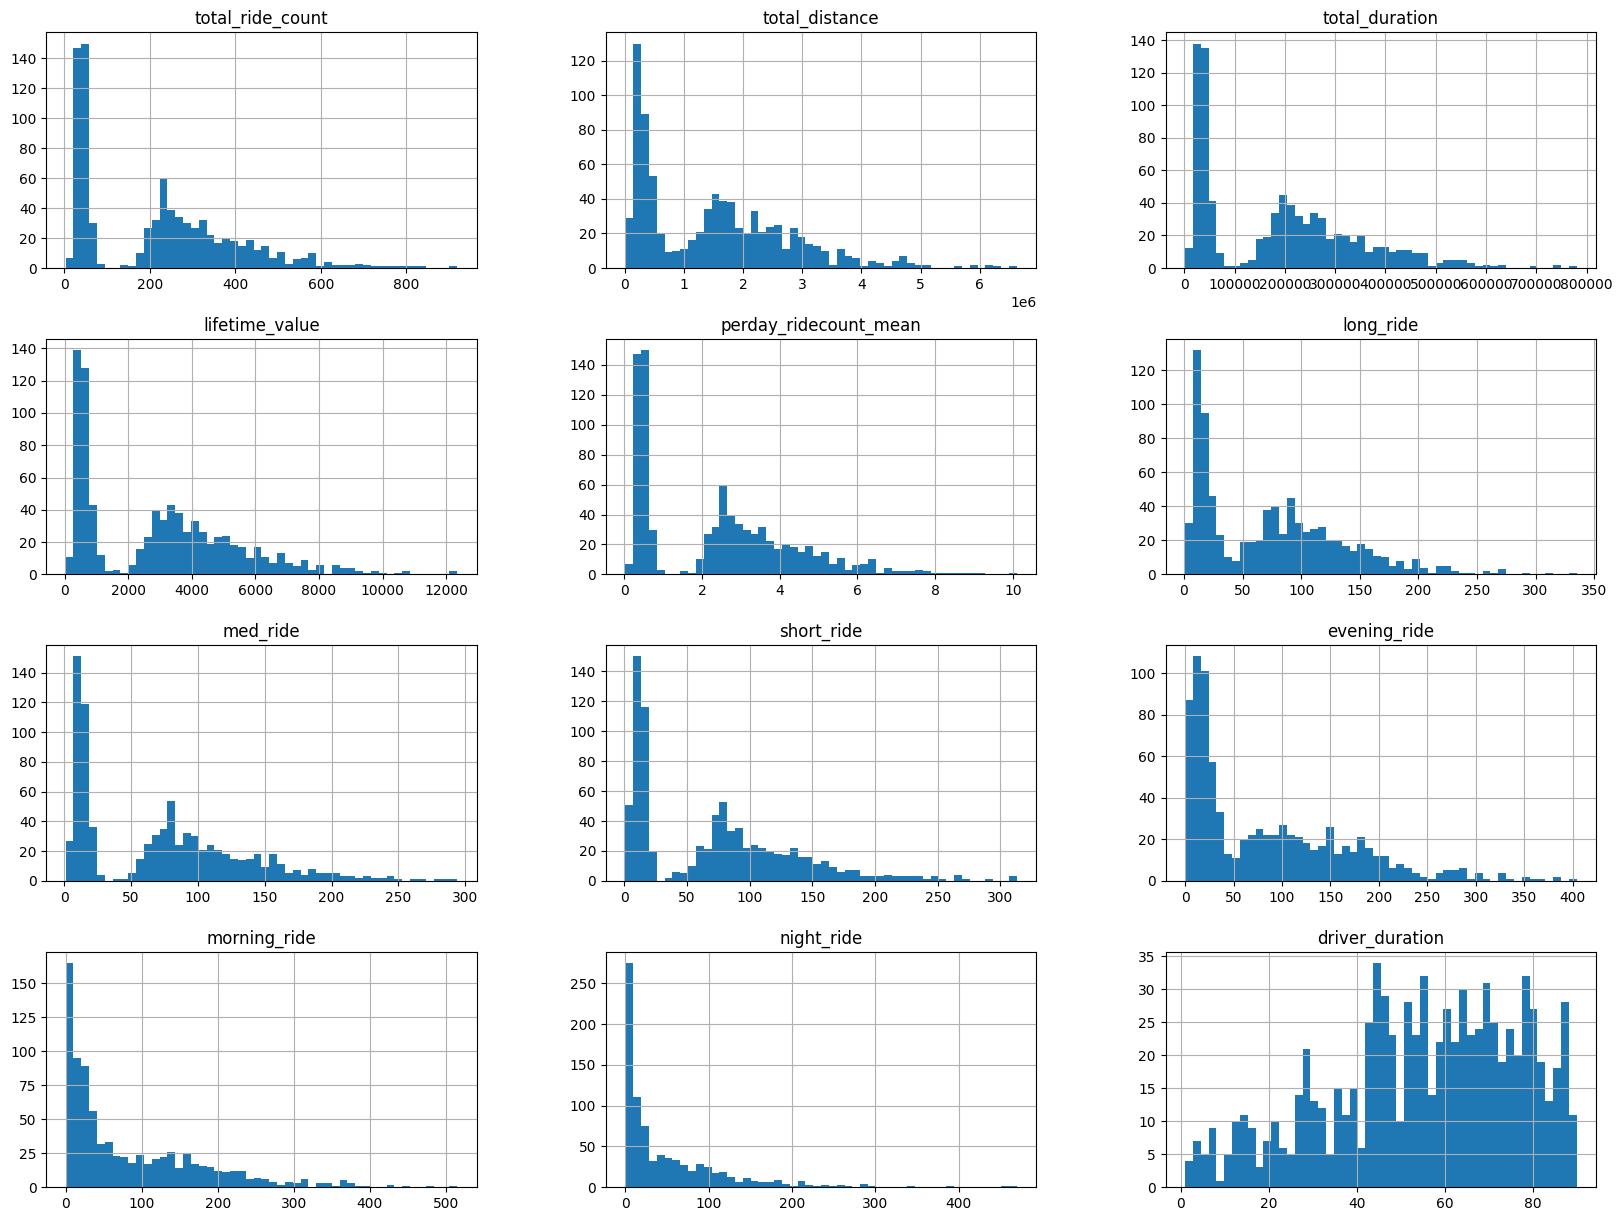

In [21]:
# Plot Histgrams of data
driver_info.hist(bins=50, figsize=(20,15))
plt.show()

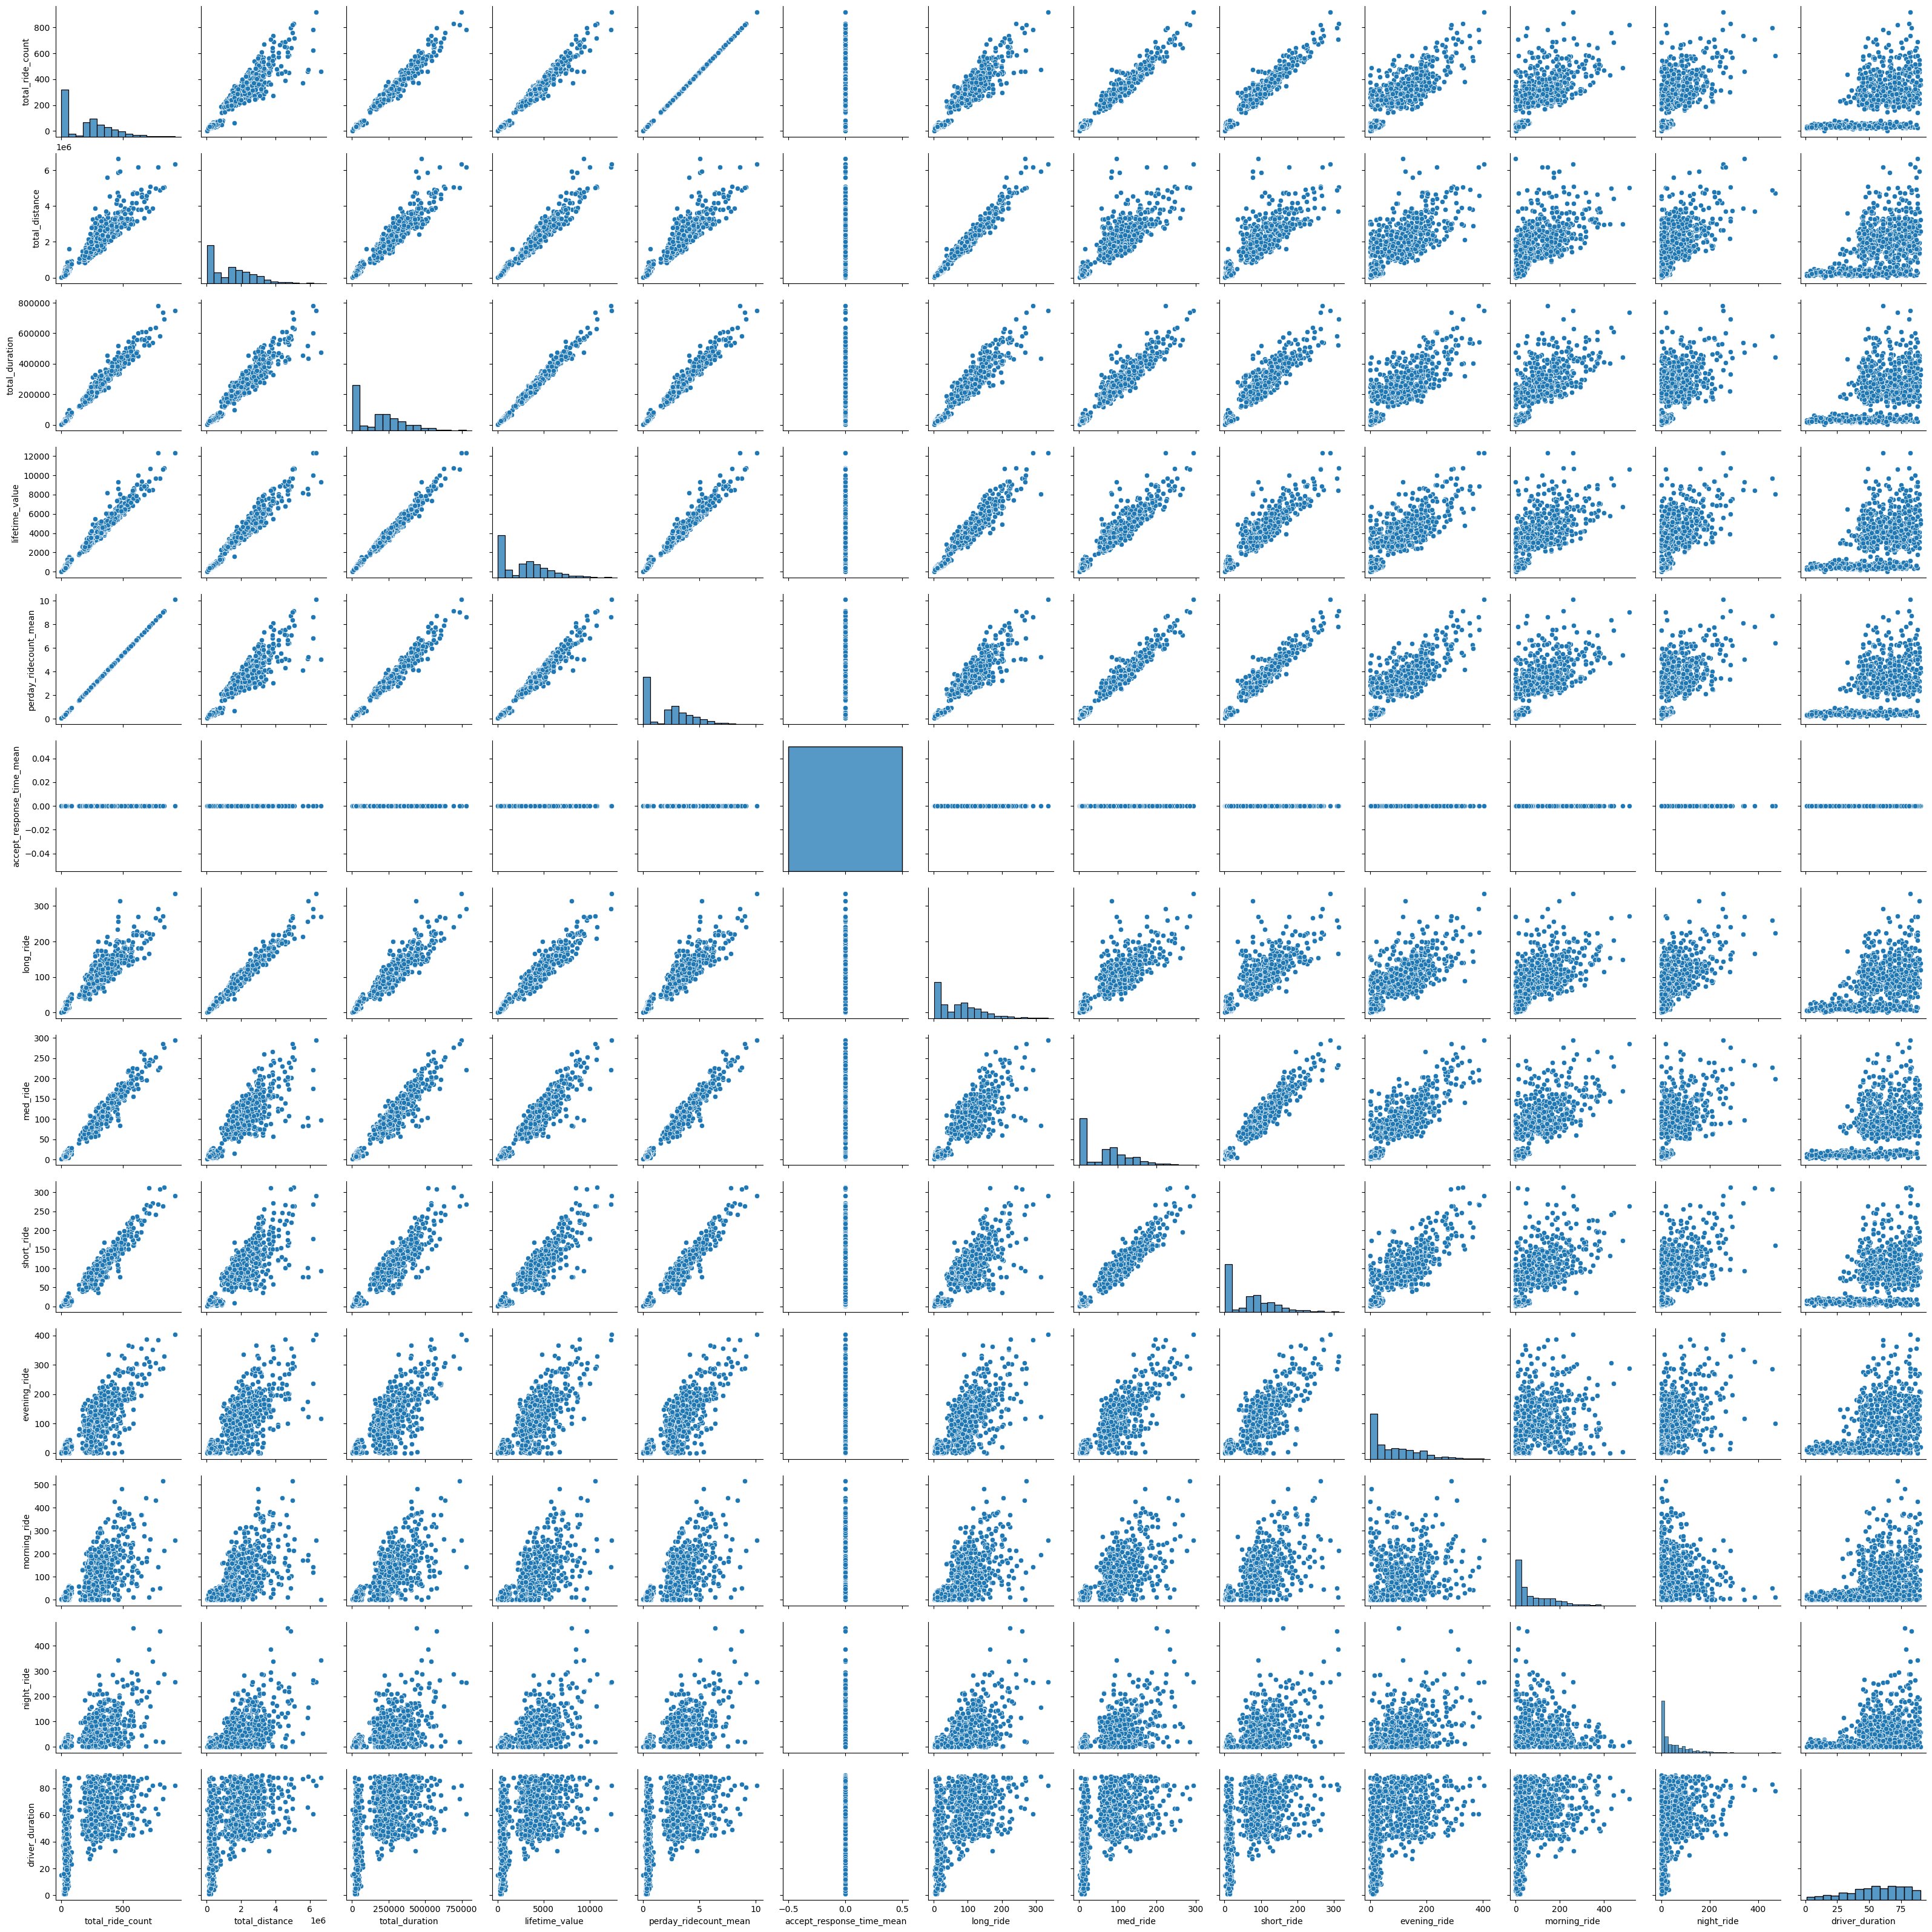

In [22]:
# scatter plots of data
sns.pairplot(driver_info)

**Main Factors Affecting a Driver's Lifetime Value**

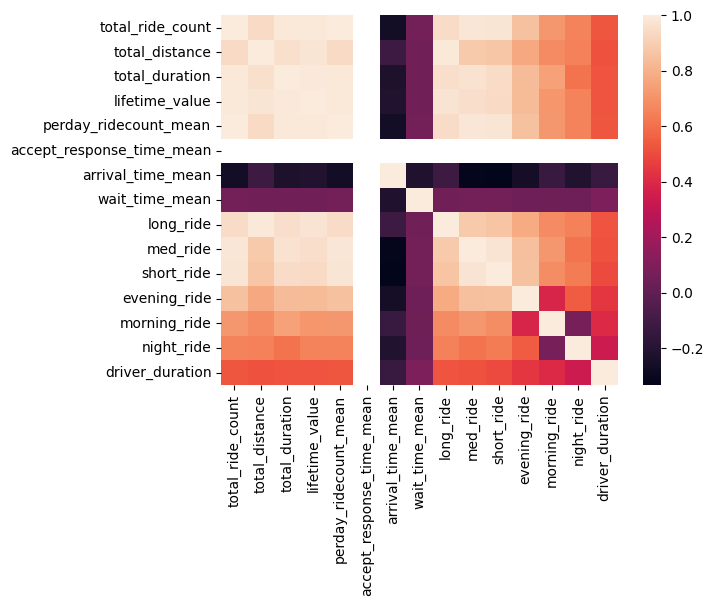

In [24]:
# plot a heatmap of correlations betweem features
# Exclude the non-numeric 'driver_id' column before calculating the correlation
sns.heatmap(driver_info.drop('driver_id', axis=1).corr())
plt.show() # Add plt.show() to display the heatmap

In [26]:
# get a correlation with lifetime_value as a DataFrame sorted in descending order
pd.DataFrame(driver_info.drop('driver_id', axis=1).corr()['lifetime_value']).sort_values(by= 'lifetime_value' , ascending=False).iloc[1:]

,lifetime_value
total_duration,0.994194
total_ride_count,0.987069
perday_ridecount_mean,0.987069
total_distance,0.978453
long_ride,0.971439
med_ride,0.954142
short_ride,0.940301
evening_ride,0.833416
morning_ride,0.710687
night_ride,0.652164


**Average Projected Lifetime of a Driver**

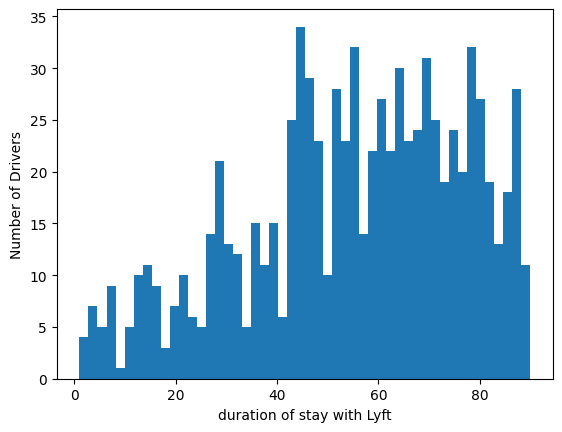

In [27]:
driver_info['driver_duration'].plot.hist(bins=50)
plt.xlabel('duration of stay with Lyft')
plt.ylabel('Number of Drivers')
plt.show()

In [28]:
driver_info['driver_duration'].describe()

,driver_duration
count,837.000000
mean,55.075269
std,21.721934
min,1.000000
25%,42.000000
50%,57.000000
75%,73.000000
max,90.000000


**Do All Drivers Act Alike? - Clustering Exercise**

In [39]:
# Convert timedelta columns to total seconds
for col in driver_info.select_dtypes(include='timedelta64').columns:
    driver_info[col] = driver_info[col].dt.total_seconds()


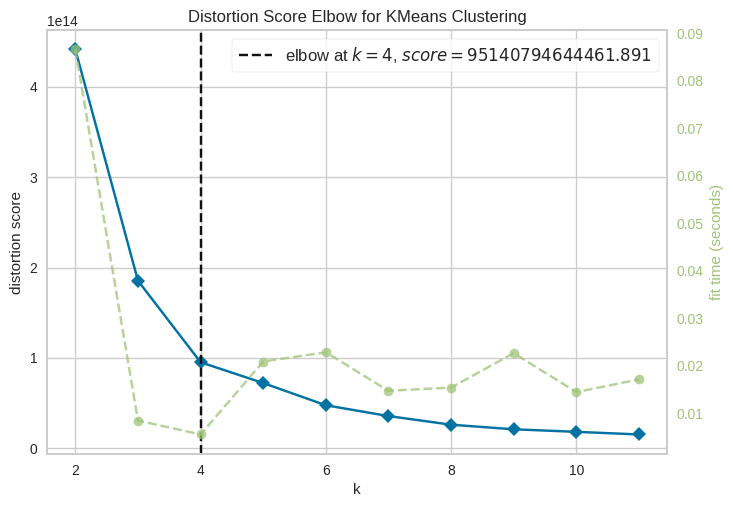

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [40]:
model = KMeans(random_state=42)
visualizer = KElbowVisualizer(model, k=(2, 12))
visualizer.fit(driver_info.drop(['driver_id'], axis=1))
visualizer.show()


In [41]:
# Fit a K-Means model with the optimal number of clusters
kmeans = KMeans(n_clusters=visualizer.elbow_value_, random_state=42)
kmeans.fit(driver_info.drop(['driver_id'], axis=1))

KMeans(n_clusters=np.int64(4), random_state=42)

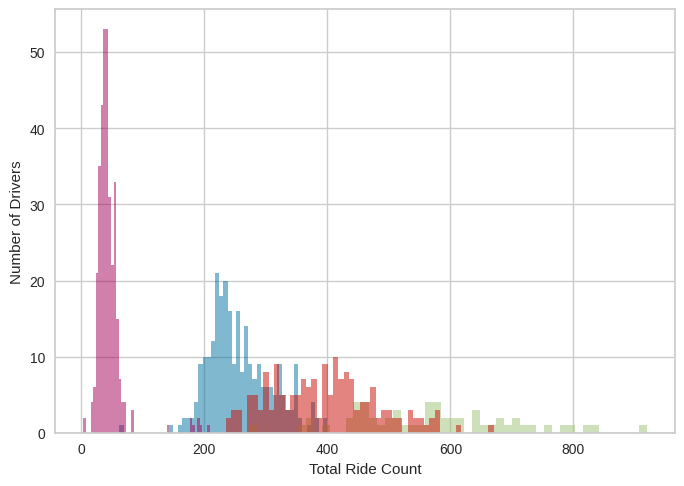

In [42]:
# Add the cluster labels to the dataframe
driver_info['cluster'] = kmeans.labels_

# Plot the distribution of total ride count by cluster
driver_info.groupby('cluster')['total_ride_count'].plot.hist(bins=50, alpha=0.5)
plt.xlabel('Total Ride Count')
plt.ylabel('Number of Drivers')
plt.show()

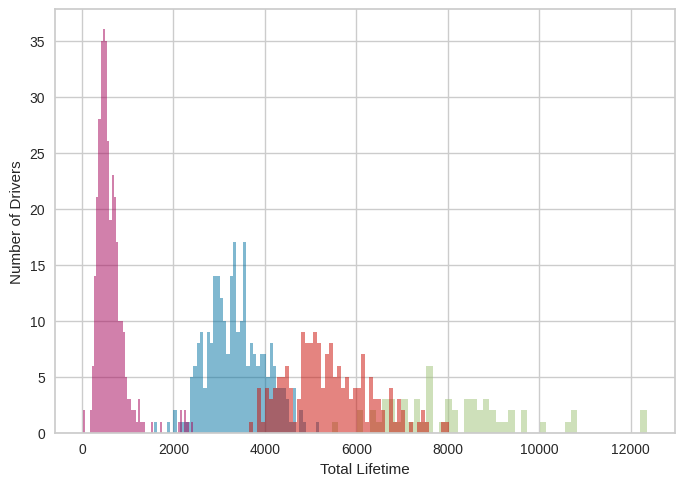

In [43]:
# Plot the distribution of total earnings by cluster
driver_info.groupby('cluster')['lifetime_value'].plot.hist(bins=50, alpha=0.5)
plt.xlabel('Total Lifetime')
plt.ylabel('Number of Drivers')
plt.show()

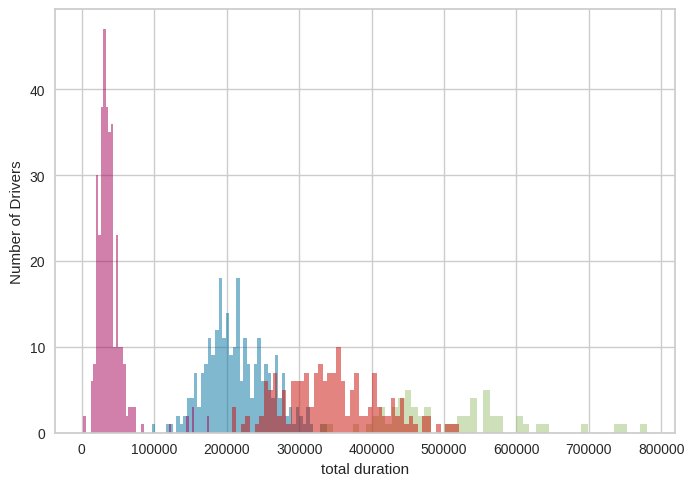

In [44]:
# Plot the distribution of total duration by cluster
driver_info.groupby('cluster')['total_duration'].plot.hist(bins=50, alpha=0.5)
plt.xlabel('total duration')
plt.ylabel('Number of Drivers')
plt.show()

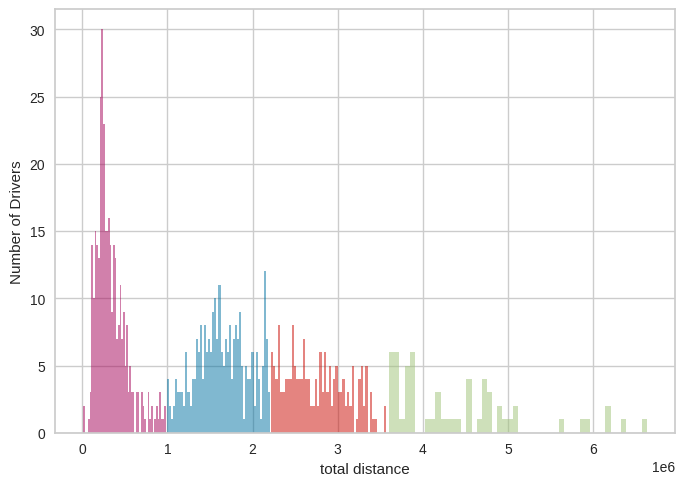

In [45]:
# Plot the distribution of total distance by cluster
driver_info.groupby('cluster')['total_distance'].plot.hist(bins=50, alpha=0.5)
plt.xlabel('total distance')
plt.ylabel('Number of Drivers')
plt.show()

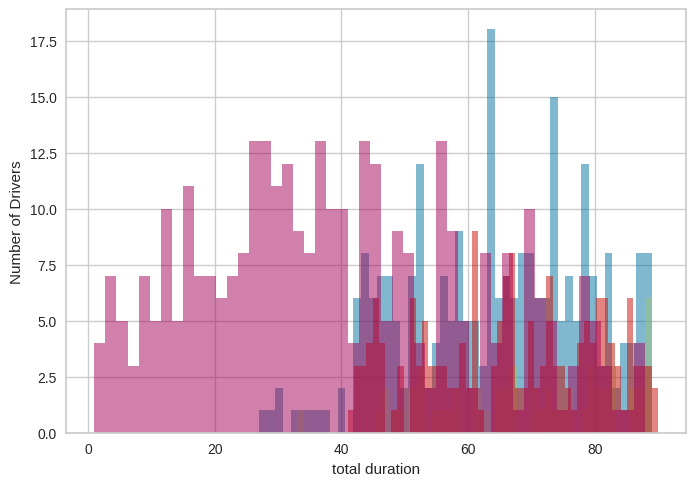

In [46]:
# Plot the distribution of driver's lifetime by cluster
driver_info.groupby('cluster')['driver_duration'].plot.hist(bins=50, alpha=0.5)
plt.xlabel('total duration')
plt.ylabel('Number of Drivers')
plt.show()

In [48]:
driver_info.groupby('cluster')[[
    'lifetime_value', 'med_ride', 'perday_ridecount_mean',
    'total_ride_count', 'short_ride', 'total_duration', 'total_distance',
    'long_ride', 'evening_ride', 'night_ride', 'morning_ride',
    'driver_duration', 'wait_time_mean'
]].agg('mean')


,lifetime_value,med_ride,perday_ridecount_mean,total_ride_count,short_ride,total_duration,total_distance,long_ride,evening_ride,night_ride,morning_ride,driver_duration,wait_time_mean
cluster,,,,,,,,,,,,,
0,3363.981468,87.397727,2.827381,257.291667,88.484848,215617.162879,1.644211e+06,81.409091,100.943182,56.950758,99.397727,64.295455,0.000000
1,8137.326695,178.965517,6.289314,572.327586,183.086207,507088.017241,4.425166e+06,210.275862,219.448276,150.327586,202.551724,68.827586,0.000000
2,5381.529181,131.637427,4.347150,395.590643,129.146199,343595.760234,2.757276e+06,134.807018,147.555556,88.023392,160.011696,66.584795,0.000000
3,619.803328,13.889535,0.493324,44.892442,13.764535,38684.023256,3.405301e+05,17.238372,18.694767,8.921512,17.276163,39.959302,-0.008721


In [50]:
grouped_df = driver_info.groupby('cluster')[[
    'lifetime_value', 'med_ride', 'perday_ridecount_mean',
    'total_ride_count', 'short_ride', 'total_duration', 'total_distance',
    'long_ride', 'evening_ride', 'night_ride', 'morning_ride',
    'driver_duration', 'wait_time_mean'
]].agg('mean')


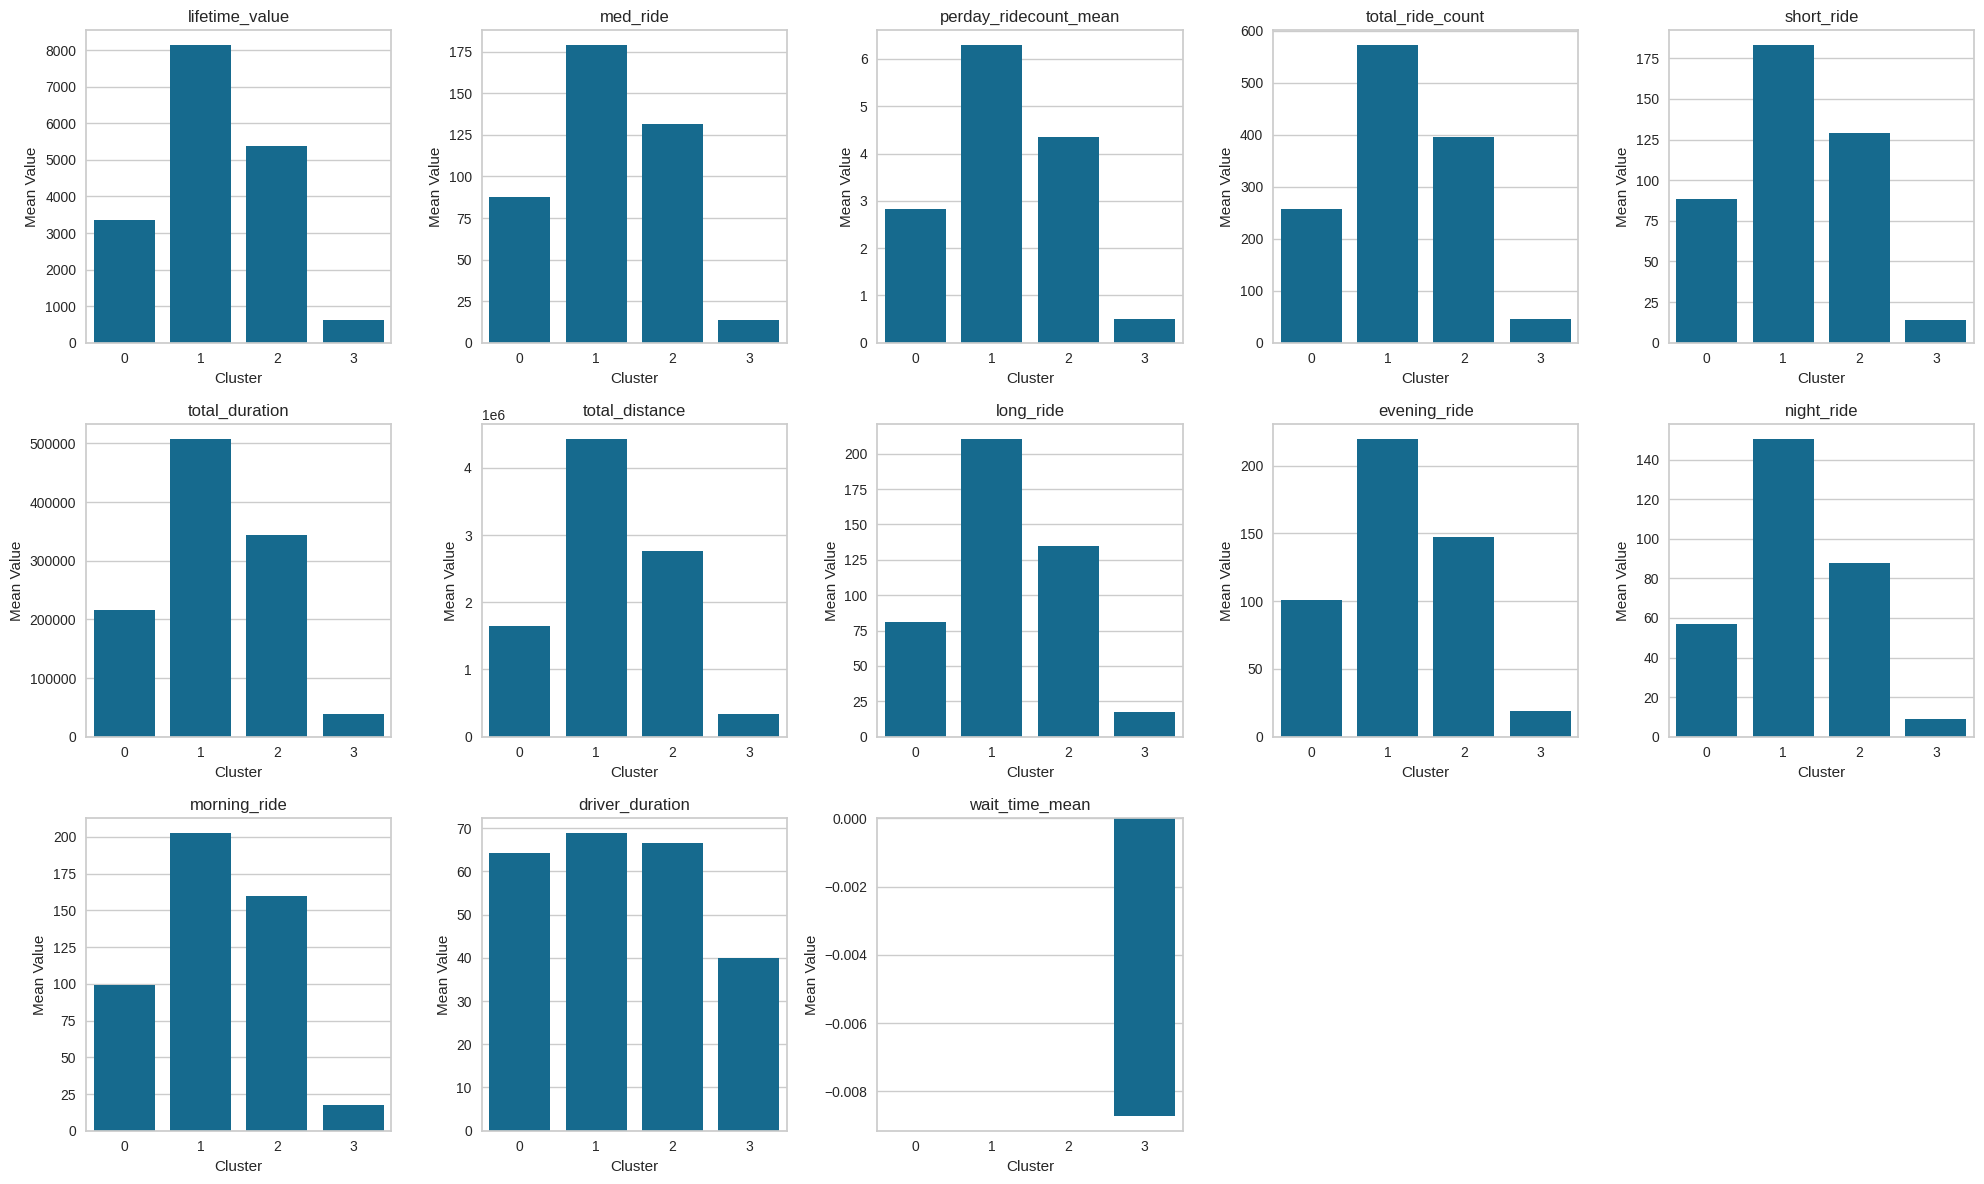

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(20, 12))  # adjust to your number of features
axes = axes.flatten()

for i, column in enumerate(grouped_df.columns):
    sns.barplot(x=grouped_df.index, y=grouped_df[column], ax=axes[i])
    axes[i].set_title(column)
    axes[i].set_xlabel("Cluster")
    axes[i].set_ylabel("Mean Value")

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


After seeing these plots we can define clusters as bad drivers, fair drivers, good drivers, and excellent drivers:

**Cluster 0** isBad drivers: This cluster has drivers with relatively low total lifetime value, low total ride count, and low total duration and distance. They may have issues with customer service, low demand for their services, or low fares.

**Cluster 2** is Fair drivers: This cluster has drivers with moderate total lifetime value, ride count, duration, and distance. They may not have a high demand for their services, but they also do not have any major issues that impact their earnings.

**Cluster 1** is Good drivers: This cluster has drivers with higher total lifetime value, higher ride count, and higher total duration and distance than the first two clusters. They may have a consistent demand for their services and a good reputation, leading to higher earnings.

**Cluster 3** is Excellent drivers: This cluster has drivers with the highest total lifetime value, ride count, and total duration and distance. These drivers are likely the most in demand and have a good reputation for providing excellent service to their customers, leading to high earnings.

**Actionable Recommendations**


Here are a few actionable recommendations based on the clustering analysis performed on the driver information data:

Focus on retaining good and excellent drivers: The business should focus on retaining the drivers who belong to the good and excellent clusters as they bring in more revenue and have more frequent rides compared to other drivers.

Target improvement of fair drivers: The business should target to improve the performance of fair drivers, to convert them into good or excellent drivers.

Identify and address issues faced by bad drivers: The business should identify and address the issues faced by the bad drivers, such as low earnings, low ride frequency, and low ride duration, to improve their performance.

Personalized incentives and training: The business can offer personalized incentives and training to drivers based on their performance clusters to further improve their performance.

Use clustering results for dynamic pricing: The clustering results can be used for dynamic pricing, where prices can be adjusted based on the supply and demand of drivers in a particular area.

Monitor performance regularly: The business should regularly monitor the performance of drivers and reassess them based on the clustering results to ensure that they are being properly targeted with the appropriate incentives and support.